In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load 
mouse_drug_data_to_load = "Data/mouse_drug_data.csv"
clinical_trial_data_to_load = "Data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_data = pd.merge(drug_data, clinical_data, how="inner", on="Mouse ID")

# Display the data table for preview
combined_data.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_group = combined_data.groupby(["Drug", "Timepoint"])
tumor_mean = drug_group["Tumor Volume (mm3)"].mean()
# Convert to DataFrame
tumor_mean_df = pd.DataFrame(tumor_mean)
tumor_avg_df = tumor_mean_df.reset_index(level=['Drug', 'Timepoint'])
# Preview DataFrame
tumor_avg_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_sem = drug_group["Tumor Volume (mm3)"].sem()
# Convert to DataFrame
tumor_sem = pd.DataFrame(tumor_sem)
tumor_sem_df = tumor_sem.reset_index(level=['Drug', 'Timepoint'])
# Preview DataFrame
tumor_sem_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
reformatted_tumor = pd.DataFrame(tumor_avg_df.iloc[0:10, 1]).set_index("Timepoint")
reformatted_sem = pd.DataFrame(tumor_sem_df.iloc[0:10, 1]).set_index("Timepoint")
num_drugs = 10
for i in range(0, num_drugs):
    reformatted_tumor[tumor_avg_df.iloc[(i*num_drugs),0]] = tumor_avg_df.iloc[(i*num_drugs):((i*num_drugs) + num_drugs),[1,2]].set_index("Timepoint")
    reformatted_sem[tumor_sem_df.iloc[(i*num_drugs),0]] = tumor_sem_df.iloc[(i*num_drugs):((i*num_drugs) + num_drugs),[1,2]].set_index("Timepoint")
# Preview that Reformatting worked
reformatted_tumor
reformatted_sem

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


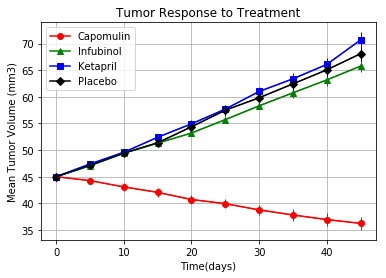

In [5]:
# Generate the Plot (with Error Bars)
# Create a list of the timepoints that will be on x-axis
timepoints = list(range(0,46,5))

# Plot lines for (4) different drugs/placebfig, ax = plt.subplots()
plt.plot(timepoints, reformatted_tumor["Capomulin"], marker='o', color="red", label = "Capomulin")
plt.errorbar(timepoints, reformatted_tumor["Capomulin"], reformatted_sem["Capomulin"], linewidth=1, color='r', label=None)

plt.plot(timepoints, reformatted_tumor["Infubinol"], marker='^', color="green", label = "Infubinol")
plt.errorbar(timepoints, reformatted_tumor["Infubinol"], reformatted_sem["Infubinol"], linewidth=1, color='g', label=None)

plt.plot(timepoints, reformatted_tumor["Ketapril"], marker='s', color="blue", label = "Ketapril")
plt.errorbar(timepoints, reformatted_tumor["Ketapril"], reformatted_sem["Ketapril"], linewidth=1, color='blue', label=None)

plt.plot(timepoints, reformatted_tumor["Placebo"], marker='D', color="black", label = "Placebo")
plt.errorbar(timepoints, reformatted_tumor["Placebo"], reformatted_sem["Placebo"], linewidth=1, color='black', label=None)

# Format plot
plt.title("Tumor Response to Treatment")
plt.legend(loc="Best")
plt.xlabel("Time(days)")
plt.ylabel("Mean Tumor Volume (mm3)")
plt.grid()

# Save figure
plt.savefig("Images/TumorResponse.png")

plt.show()

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
drug_group = combined_data.groupby(["Drug", "Timepoint"])
meta_mean = drug_group["Metastatic Sites"].mean()
# Convert to DataFrame
meta_mean_df = pd.DataFrame(meta_mean)
meta_avg_df = meta_mean_df.reset_index(level=['Drug', 'Timepoint'])
# Preview DataFrame
meta_avg_df

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
5,Capomulin,25,0.818182
6,Capomulin,30,1.090909
7,Capomulin,35,1.181818
8,Capomulin,40,1.380952
9,Capomulin,45,1.476190


In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_sem = drug_group["Metastatic Sites"].sem()
# Convert to DataFrame
meta_sem = pd.DataFrame(meta_sem)
meta_sem_df = meta_sem.reset_index(level=['Drug', 'Timepoint'])
# Preview DataFrame
meta_sem_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [8]:
# Reformat data frames 
reformatted_meta = pd.DataFrame(meta_avg_df.iloc[0:10, 1]).set_index("Timepoint")
reformatted_meta_sem = pd.DataFrame(meta_sem_df.iloc[0:10, 1]).set_index("Timepoint")
num_drugs = 10
for i in range(0, num_drugs):
    reformatted_meta[meta_avg_df.iloc[(i*num_drugs),0]] = meta_avg_df.iloc[(i*num_drugs):((i*num_drugs) + num_drugs),[1,2]].set_index("Timepoint")
    reformatted_meta_sem[meta_sem_df.iloc[(i*num_drugs),0]] = meta_sem_df.iloc[(i*num_drugs):((i*num_drugs) + num_drugs),[1,2]].set_index("Timepoint")
# Preview that Reformatting worked
reformatted_meta
reformatted_meta_sem

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


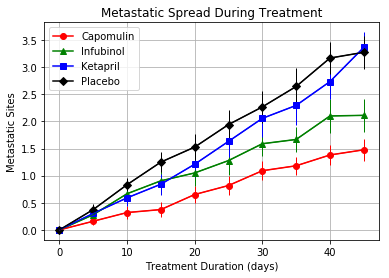

In [9]:
# Generate the Plot (with Error Bars)
# Create a list of the timepoints that will be on x-axis
timepoints = list(range(0,46,5))

# Plot lines for (4) different drugs/placebfig, ax = plt.subplots()
plt.plot(timepoints, reformatted_meta["Capomulin"], marker='o', color="red", label = "Capomulin")
plt.errorbar(timepoints, reformatted_meta["Capomulin"], reformatted_meta_sem["Capomulin"], linewidth=1, color='r', label=None)

plt.plot(timepoints, reformatted_meta["Infubinol"], marker='^', color="green", label = "Infubinol")
plt.errorbar(timepoints, reformatted_meta["Infubinol"], reformatted_meta_sem["Infubinol"], linewidth=1, color='g', label=None)

plt.plot(timepoints, reformatted_meta["Ketapril"], marker='s', color="blue", label = "Ketapril")
plt.errorbar(timepoints, reformatted_meta["Ketapril"], reformatted_meta_sem["Ketapril"], linewidth=1, color='blue', label=None)

plt.plot(timepoints, reformatted_meta["Placebo"], marker='D', color="black", label = "Placebo")
plt.errorbar(timepoints, reformatted_meta["Placebo"], reformatted_meta_sem["Placebo"], linewidth=1, color='black', label=None)

# Format plot
plt.title("Metastatic Spread During Treatment")
plt.legend(loc="Best")
plt.xlabel("Treatment Duration (days)")
plt.ylabel("Metastatic Sites")
plt.grid()
plt.savefig("Images/MetastaticSpread.png")
plt.show()

## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = drug_group["Metastatic Sites"].count()
# Convert to DataFrame
mice_count_df = pd.DataFrame(mice_count)
mice_count_df = mice_count_df.reset_index(level=['Drug', 'Timepoint'])
# Preview DataFrame
mice_count_df = mice_count_df.rename(columns={"Metastatic Sites":"Mice Count"})
mice_count_df.head()

,Drug,Timepoint,Mice Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [11]:
# Include Survival Rate depending on Mice Count in data frame
mice_count_df["Survival Rate"] = ((mice_count_df["Mice Count"])/25)*100
mice_count_df

,Drug,Timepoint,Mice Count,Survival Rate
0,Capomulin,0,25,100.0
1,Capomulin,5,25,100.0
2,Capomulin,10,25,100.0
3,Capomulin,15,24,96.0
4,Capomulin,20,23,92.0
5,Capomulin,25,22,88.0
6,Capomulin,30,22,88.0
7,Capomulin,35,22,88.0
8,Capomulin,40,21,84.0
9,Capomulin,45,21,84.0


In [12]:
# Reformat data frames using only Survival Rate
reformatted_surv = pd.DataFrame(mice_count_df.iloc[0:10, 1]).set_index("Timepoint")
num_drugs = 10
for i in range(0, num_drugs):
    reformatted_surv[mice_count_df.iloc[(i*num_drugs),0]] = mice_count_df.iloc[(i*num_drugs):((i*num_drugs) + num_drugs),[1, 3]].set_index("Timepoint")
# Preview that Reformatting worked
reformatted_surv

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,104.0,100.0,104.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,100.0,100.0,100.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,92.0,96.0,92.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,68.0,96.0,92.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,68.0,92.0,84.0,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,56.0,92.0,76.0,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,52.0,92.0,72.0,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,40.0,84.0,64.0,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,36.0,80.0,48.0,56.0


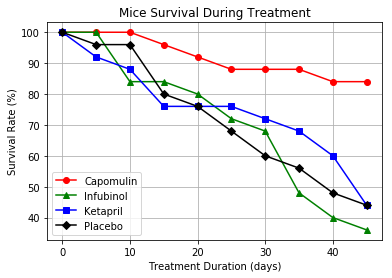

In [13]:
# Generate the Plot (Accounting for percentages)
plt.plot(timepoints, reformatted_surv["Capomulin"], marker='o', color="red", label = "Capomulin")
plt.plot(timepoints, reformatted_surv["Infubinol"], marker='^', color="green", label = "Infubinol")
plt.plot(timepoints, reformatted_surv["Ketapril"], marker='s', color="blue", label = "Ketapril")
plt.plot(timepoints, reformatted_surv["Placebo"], marker='D', color="black", label = "Placebo")
# Format the Figure
plt.title("Mice Survival During Treatment")
plt.legend(loc="Best")
plt.xlabel("Treatment Duration (days)")
plt.ylabel("Survival Rate (%)")
plt.grid()
# Show the Figure
plt.savefig("Images/Survival.png")
plt.show()

In [14]:
tumor_avg_df.iloc[(2*num_drugs + num_drugs),2]  
#tumor_avg_df.iloc[i*num_drugs, 2]

45.0

## Summary Bar Graph

In [15]:
# Calculate the percent changes for each drug
tumor_change = {}
for i in range(0,num_drugs):
    tumor_change[tumor_avg_df.iloc[(i*num_drugs),0]] = tumor_avg_df.iloc[((i*num_drugs) + num_drugs - 1),2] - tumor_avg_df.iloc[i*num_drugs, 2]
    
# Display the data to confirm
tumor_change


{'Capomulin': -8.763886200552378,
 'Ceftamin': 19.13242133515385,
 'Infubinol': 20.755562277533343,
 'Ketapril': 25.662957608972732,
 'Naftisol': 24.26550621064615,
 'Placebo': 23.084082217418185,
 'Propriva': 21.258528688442865,
 'Ramicane': -10.044405208245003,
 'Stelasyn': 23.438310429554562,
 'Zoniferol': 20.960887889292863}

In [16]:
# Create list containing tumor changes for Capomulin, Infubinol, Ketapril, and Placebo
drug_names = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
tumor_changes= []
tumor_changes.append(round((tumor_change["Capomulin"]/reformatted_tumor.loc[0,"Capomulin"])*100,0))
tumor_changes.append(round((tumor_change["Infubinol"]/reformatted_tumor.loc[0,"Capomulin"])*100,0))
tumor_changes.append(round((tumor_change["Ketapril"]/reformatted_tumor.loc[0,"Capomulin"])*100,0))
tumor_changes.append(round((tumor_change["Placebo"]/reformatted_tumor.loc[0,"Capomulin"])*100,0))
# x axis
x_axis = np.arange(len(drug_names))

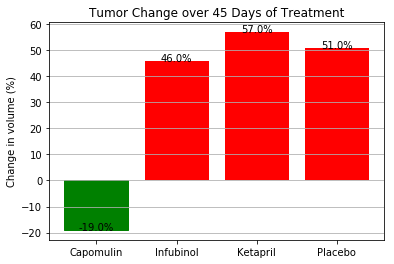

In [17]:
# Plot bar chart
drug_bar = plt.bar(x_axis, tumor_changes, color="r", align="center")
drug_bar[0].set_color('g')
# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_names)
# Format plot
plt.grid(axis='y')
plt.title("Tumor Change over 45 Days of Treatment")
plt.ylabel("Change in volume (%)")
for i in np.arange(len(drug_names)):
    plt.text(i, tumor_changes[i], f'{str(tumor_changes[i])}%', horizontalalignment='center')
plt.savefig("Images/TumorChange.png")
plt.show()